# SQL Project

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.

You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. 
## the goal of the study:to generate a value proposition for a new product.

## Description of the data

### books:
Contains data on books:

book_id

author_id

title

num_pages — number of pages

publication_date

publisher_id

### authors:

Contains data on authors:

author_id

author

### publishers:

Contains data on publishers:

publisher_id

publisher

### ratings:

Contains data on user ratings:

rating_id

book_id

username — the name of the user who rated the book

rating

### reviews:

Contains data on customer reviews:

review_id

book_id

username — the name of the user who reviewed the book

text — the text of the review


# ER Diagram

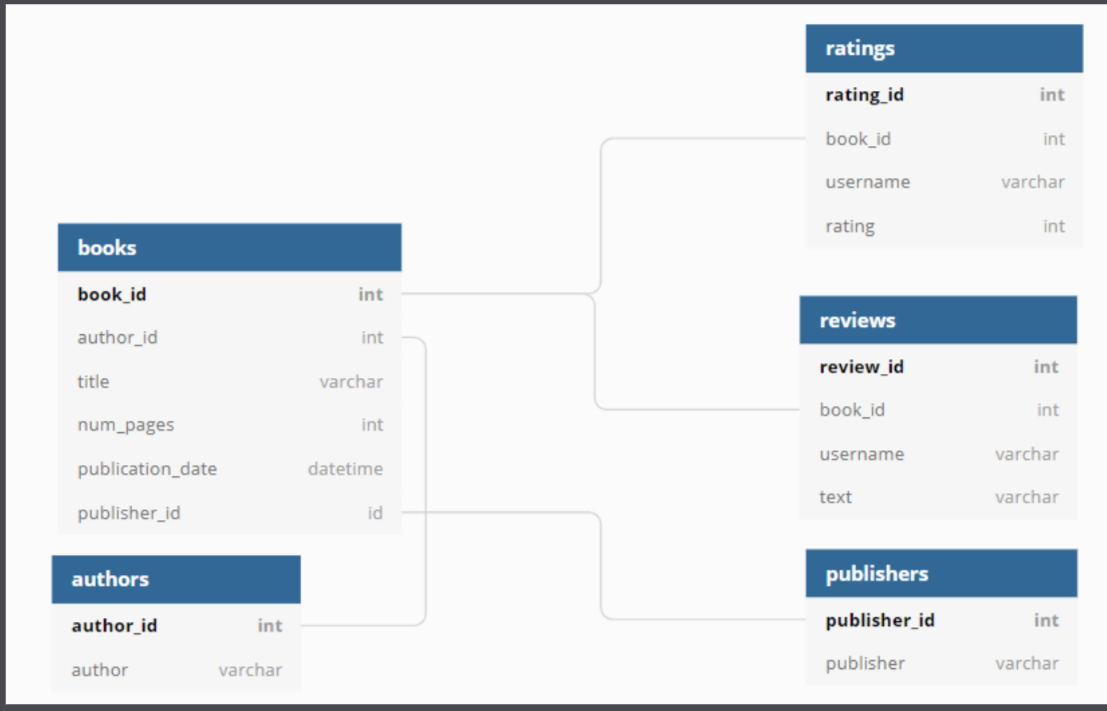

In [3]:
import pandas as pd
from sqlalchemy import create_engine

## Building a connection to the database

In [8]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [9]:
db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 


## Generic function for reading the Queries 

In [33]:
def read(query):
    return pd.io.sql.read_sql(query, con = engine) 

### task 1 - number of books released after January 1, 2000.

In [34]:
books_table = '''SELECT *
                 FROM books'''
books = read(books_table)

books.info()
books.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [35]:
min_date = '2000-01-01' 
task_1 = ''' SELECT COUNT(*)
             FROM books
             WHERE publication_date::TIMESTAMP > '{}'
         '''.format(min_date)
task_1 = pd.io.sql.read_sql(task_1, con = engine)
task_1

,count
0,819


wow! 82% of the books released after this date.

In [36]:
books.describe()

,book_id,author_id,num_pages,publisher_id
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,320.417000,389.11100,171.270000
std,288.819436,181.620172,229.39014,99.082685
min,1.000000,1.000000,14.00000,1.000000
25%,250.750000,162.750000,249.00000,83.000000
50%,500.500000,316.500000,352.00000,177.500000
75%,750.250000,481.000000,453.00000,258.000000
max,1000.000000,636.000000,2690.00000,340.000000


the mean of the num of pages is 389. but we see the minimum pages (14) and this is tell us that we have a very short books.
and book with 2690 pages!!! its seem not so real. lets check this things.

In [37]:
max_pages = '''SELECT num_pages
               FROM books
               ORDER BY num_pages DESC
               LIMIT (10)
               '''
max_pages = read(max_pages)

max_pages

,num_pages
0,2690
1,2088
2,1728
3,1556
4,1456
5,1443
6,1392
7,1276
8,1273
9,1207


So we have one particularly bombastic book. The rest of the books on this list are not small but still with reasonable numbers.

### task 2 -  number of user reviews.

In [17]:
reviews_table = '''SELECT *
                   FROM reviews'''

reviews = read(reviews_table)

reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [18]:
task_2 = '''SELECT COUNT(review_id)
            FROM reviews
            '''
task_2 = pd.io.sql.read_sql(task_2, con = engine)
task_2

,count
0,2793


### task 3 -  average rating for each book.

In [20]:
rating_table ='''SELECT *
                 FROM ratings'''

rating = read(rating_table)

rating.info()
rating.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [21]:
task_3 = '''SELECT b.book_id, b.title, AVG(r.rating) AS avg_rating, COUNT(DISTINCT r.username) AS num_reviews
            FROM books b
            JOIN ratings r ON b.book_id = r.book_id
            GROUP BY b.book_id
            ORDER BY avg_rating'''

task_3 = read(task_3)
task_3

,book_id,title,avg_rating,num_reviews
0,303,Harvesting the Heart,1.50,2
1,371,Junky,2.00,2
2,316,His Excellency: George Washington,2.00,2
3,202,Drowning Ruth,2.00,3
4,915,The World Is Flat: A Brief History of the Twen...,2.25,4
...,...,...,...,...
995,421,Marvel 1602,5.00,2
996,418,March,5.00,2
997,169,Crucial Conversations: Tools for Talking When ...,5.00,2
998,901,The Walking Dead Book One (The Walking Dead #...,5.00,2


the minimum rate is 1.50  and the maximum is 5.

### task 4 -  publisher released books with mor then 50 pages.

In [22]:
publishers_table = '''SELECT *
                      FROM publishers'''

publishers = read(publishers_table)

publishers.info()
publishers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [23]:
task_4 = '''SELECT p.publisher, COUNT(*) AS num_books
            FROM books b
            JOIN publishers p ON b.publisher_id = p.publisher_id
            WHERE b.num_pages > 50
            GROUP BY p.publisher_id
            ORDER BY num_books DESC
            LIMIT 1
            
            '''
task_4 = read(task_4)
task_4

,publisher,num_books
0,Penguin Books,42


### task 5 -  author with the highest average book rating: look only at books with at least 50 ratings.

In [24]:
authors_table = '''SELECT *
                   FROM authors'''
authors = read(authors_table)

authors.info()
authors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [38]:
task_5 = '''
            SELECT author,
            AVG(rating) author_rating
       
            FROM authors AS a
            JOIN books AS b ON a.author_id = b.author_id
            JOIN ratings AS r ON b.book_id = r.book_id

            WHERE b.book_id IN ( SELECT book_id
                                 FROM ratings 
                                 GROUP BY book_id
                                 HAVING COUNT(rating_id) >= 50
                                 ORDER BY COUNT(rating_id) DESC)

            GROUP BY author

            ORDER BY author_rating DESC

            LIMIT 1'''

            
task_5 = read(task_5)
task_5

,author,author_rating
0,J.K. Rowling/Mary GrandPré,4.287097


### task 6 - average number of text reviews among users who rated more than 50 books.

In [27]:
task_6 = '''
              SELECT SUM(a.num_rev)/COUNT(*) AS avg
              
              FROM (SELECT  username, COUNT(review_id) AS num_rev
                    FROM reviews
                    WHERE username IN (SELECT username
                                       FROM ratings 
                                       GROUP BY username
                                       HAVING COUNT(DISTINCT book_id) > 50)
                                       GROUP BY username) AS a       
            '''

task_6 = read(task_6)
task_6

,avg
0,24.333333


### another way to solve this task(using full outer join)

In [30]:
reviews_50 = '''
            SELECT avg(tc.review_count) 

            FROM (SELECT COUNT(r.text) review_count
                  FROM reviews AS r
                  FULL OUTER JOIN (SELECT username, COUNT(rating_id) rating_count
                                   FROM ratings
                                   GROUP BY username) AS cr ON cr.username = r.username
            WHERE cr.rating_count > 50
            GROUP BY r.username) as tc
'''

reviews_50 = read(reviews_50)
reviews_50

,avg
0,24.333333


## Summary and Conclusion:


- 82% of the books were published after the year 2000.

-  we have one particularly bombastic book. The rest of the books on this list are not small but still with reasonable numbers.

- We have 2793 user reviews of the books.

- We created a table with the average for each book.

- The largest publisher (only over 50 pages) that exists in the database is "Penguin Books" with 42 books.

- Of the authors who received at least 50 ratings, the author with the highest rating average is author J.K. Rowling/Mary GrandPré with 4.28 points.

- The average number of text reviews among users who rated more than 50 books is 24.3.